CNN Notebook © Arkaprabha Majumdar

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/CNNs/datasets/catsvsdogs'
/content


In [ ]:
import os

file_names = [file for file in os.listdir('images')]
len(file_names)

3002

**Since we have 3002 files, we'll divide it like this:**



*   1000 images each for train datasets
*   500 images each for test datasets
*   and remaining two your discretion - you can add it to train, test or as custom tests at end of model



In [ ]:
import cv2
import numpy as np

cats=[]
dogs=[]

progress = 0
for file in file_names:
  if progress % 200 == 0:
    print('[ progress = ' +str(progress)+'/'+str(len(file_names))+']')
  if 'cat' in file:
    cats.append(cv2.imread('images/'+file))
  elif 'dog' in file:
    dogs.append(cv2.imread('images/'+file))
  progress+=1

[ progress = 0/3002]
[ progress = 200/3002]
[ progress = 400/3002]
[ progress = 600/3002]
[ progress = 800/3002]
[ progress = 1000/3002]
[ progress = 1200/3002]
[ progress = 1400/3002]
[ progress = 1600/3002]
[ progress = 1800/3002]
[ progress = 2000/3002]
[ progress = 2200/3002]
[ progress = 2400/3002]
[ progress = 2600/3002]
[ progress = 2800/3002]
[ progress = 3000/3002]


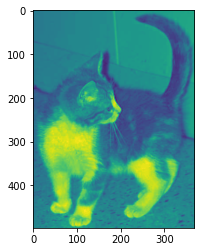

In [ ]:
plt.imshow(cats[0][...,0])

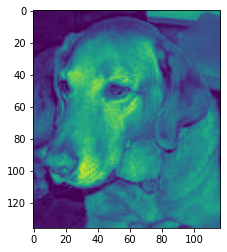

In [ ]:
plt.imshow(dogs[0][...,0])

In [ ]:
#We are dividing the dataset manually. You can also use train_test_split from sklearn. This is just so we have more control.
cats_train_data = cats[:1000]
cats_test_data = cats[1001:1501]

dogs_train_data = dogs[:1000]
dogs_test_data = dogs[1001:1501]

In [ ]:
#Next, create labels for them
cats_train_label = ['cats'] * 1000
cats_test_label = ['cats'] * 500

dogs_train_label = ['dogs'] * 1000
dogs_test_label = ['dogs'] * 500

In [ ]:
training_data = cats_train_data + dogs_train_data
training_labels = cats_train_label + dogs_train_label

test_data = cats_test_data + dogs_test_data
test_labels = cats_test_label + dogs_test_label

In [ ]:
import numpy as np

np.savez('training_data.npz',np.array(training_data))
np.savez('training_labels.npz',np.array(training_labels))
np.savez('test_data.npz',np.array(test_data))
np.savez('test_labels.npz',np.array(test_labels))

In [16]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def load_train_test(folder):
  loaded_data = [file for file in os.listdir(folder) if 'npz' in file]
  print(loaded_data)
  data=[]
  for i in range(4):
    data.append(np.load(folder+'/'+loaded_data[i],allow_pickle=True))
  train = [data[0][arr] for arr in data[0]][0]
  train_labels = [data[1][arr] for arr in data[1]][0]
  test = [data[2][arr] for arr in data[2]][0]
  test_labels = [data[3][arr] for arr in data[3]][0]
  return (train,train_labels),(test,test_labels)

In [27]:
(train,train_labels),(test,test_labels) = load_train_test('/content/drive/My Drive/Colab Notebooks/CNNs/datasets/catsvsdogs')

# resize each image to 150,150,3
x_train=[]
for i in range(len(train)):
  if i%100==0:
    print(i)
  x_train.append(cv2.resize(train[i],(150,150)))
y_train = train_labels


x_test=[]
for i in range(len(test)):
  if i%100==0:
    print(i)
  x_test.append(cv2.resize(test[i],(150,150)))
y_test = test_labels

['training_data.npz', 'training_labels.npz', 'test_data.npz', 'test_labels.npz']
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
0
100
200
300
400
500
600
700
800
900


In [32]:
#change type to float and normalize for input to neural network
x_train = np.array(x_train).astype('float32') / 255
x_test = np.array(x_test).astype('float32') / 255
y_train = [0 if x=='cats' else 1 for x in y_train]
y_test = [0 if x=='cats' else 1 for x in y_test]

In [33]:
x_train.shape

(2000, 150, 150, 3)

In [34]:
#Next we model our CNN
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout


input_shape = (150,150,3)

model = Sequential()

#let's add our layers
model.add(Conv2D(32,(2,2),activation = 'relu',input_shape = input_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [35]:
#Train the model
batch_size = 16
epochs = 25

history = model.fit(x_train,y_train,
                    batch_size=batch_size , epochs = epochs,
                    validation_data = (x_test,y_test),
                    shuffle = True)

scores = model.evaluate(x_test,y_test,verbose=1)
print('Test loss : ',scores[0])
print('Test Accuracy : ',scores[1])

Train on 2000 samples, validate on 1000 samples
Epoch 1/25
2000/2000 [==============================] - 41s 21ms/step - loss: 0.7237 - accuracy: 0.5490 - val_loss: 0.6522 - val_accuracy: 0.5990
Epoch 2/25
2000/2000 [==============================] - 41s 21ms/step - loss: 0.6453 - accuracy: 0.6505 - val_loss: 0.5914 - val_accuracy: 0.6770
Epoch 3/25
2000/2000 [==============================] - 41s 20ms/step - loss: 0.5915 - accuracy: 0.6985 - val_loss: 0.5619 - val_accuracy: 0.7140
Epoch 4/25
2000/2000 [==============================] - 41s 20ms/step - loss: 0.5411 - accuracy: 0.7190 - val_loss: 0.5597 - val_accuracy: 0.6880
Epoch 5/25
2000/2000 [==============================] - 41s 20ms/step - loss: 0.4927 - accuracy: 0.7725 - val_loss: 0.5348 - val_accuracy: 0.7320
Epoch 6/25
2000/2000 [==============================] - 42s 21ms/step - loss: 0.4497 - accuracy: 0.7965 - val_loss: 0.5407 - val_accuracy: 0.7290
Epoch 7/25
2000/2000 [==============================] - 42s 21ms/step - loss

In [36]:
model.save('/content/drive/My Drive/Colab Notebooks/CNNs/models/catvsdogclassifier_15_batches_25_epochs.h5')

872


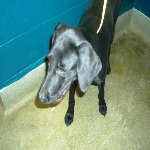

DOG
322


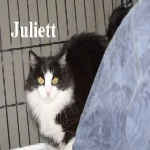

CAT
499


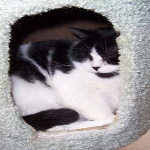

DOG
62


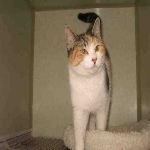

CAT
117


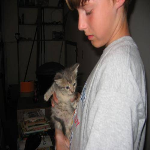

CAT
429


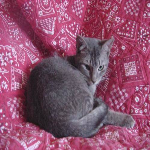

CAT
692


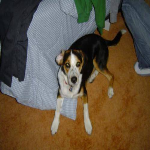

CAT
365


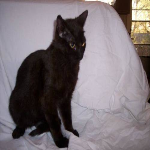

DOG
528


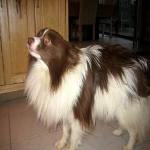

DOG
912


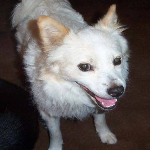

CAT


In [95]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/CNNs/models/catvsdogclassifier_15_batches_25_epochs.h5')

for i in list(range(10)):
  rand = np.random.randint(0,1000)
  print(rand)
  input_image = x_test[rand]
  cv2_imshow(input_image*255)
  input_image = input_image.reshape(1,150,150,3)
  res = model.predict_classes(input_image)[0]
  if res[0] == 0:
    print('CAT')
  elif res[0] == 1:
    print('DOG')

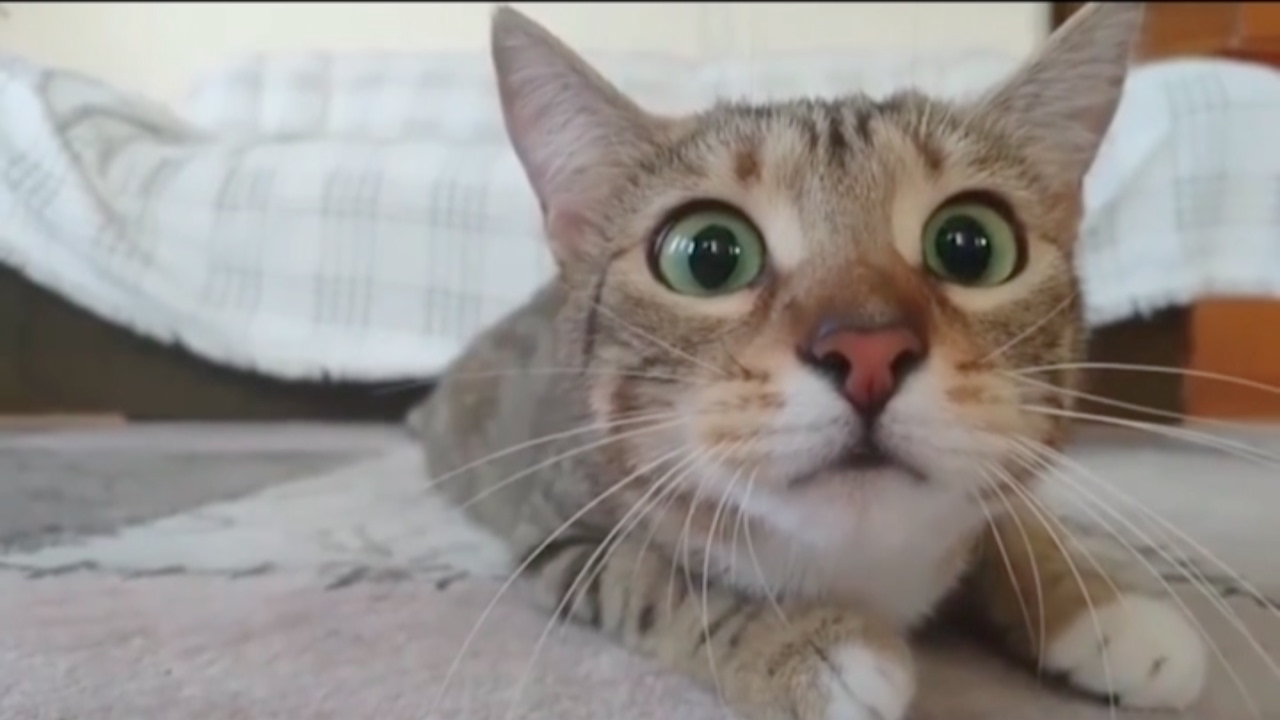

CAT


In [107]:
#Now we'll take a funny image off the internet
#https://i.ytimg.com/vi/ZDEVut4j7eU/maxresdefault.jpg

import urllib

req = urllib.request.urlopen('https://i.ytimg.com/vi/ZDEVut4j7eU/maxresdefault.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)
labeled = model.predict_classes(cv2.resize(img,(150,150)).reshape(1,150,150,3))[0]
if labeled[0] ==0:
  print('CAT')
else:
  print('DOG')